In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable

import noise
import model_opt
import algo_GD
import helper


In [33]:
gauss = pd.read_csv("exp_result/gauss_noise/gauss_noise_last_w  2020-07-03 17:34:18.992302.csv")[["iqr","w_0","w_1"]].sort_values(['iqr'])
gauss
gauss_noise = gauss.values.T

In [34]:
print("Divergence_rate {}".format(1 - gauss["w_0"].count() / len(gauss)))

Divergence_rate 0.0010999999999999899


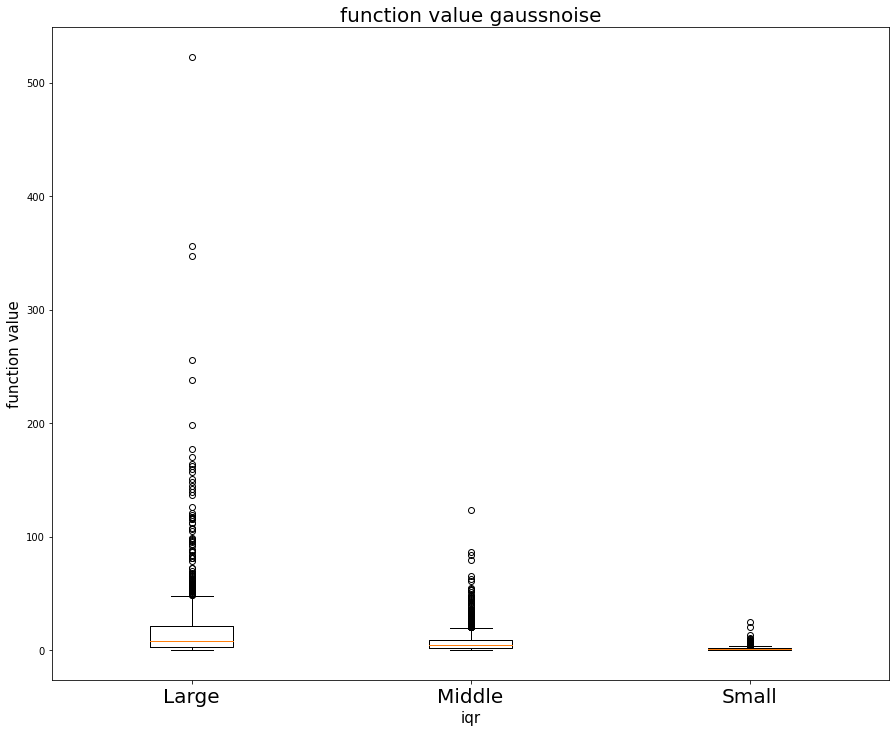

In [40]:
dai = gauss_noise[1:,7000:8000]
tyu = gauss_noise[1:,4000:5000]
syo = gauss_noise[1:,1000:2000]
f = model_opt.RosenBrock()

f_dai = f.f_opt(dai)
f_syo = f.f_opt(syo)
f_tyu = f.f_opt(tyu)
# 点数のタプル
points = f_dai,f_tyu,f_syo
small = f_syo
middle = f_tyu

# 箱ひげ図
fig = plt.figure(figsize=(15.0, 12.0))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(232)
#ax3 = fig.add_subplot(233)

bp1 = ax1.boxplot(points)
ax1.set_xticklabels(['Large',"Middle","Small"],fontsize=20)
ax1.set_title('function value gaussnoise',fontsize=20)
ax1.set_xlabel('iqr',fontsize=15)
ax1.set_ylabel('function value',fontsize=15)

"""
bp2 = ax2.boxplot((middle,small))
ax2.set_xticklabels(["Middle", "Small"])
ax2.set_title('iqr - function value gauss')
ax2.set_xlabel('iqr')
ax2.set_ylabel('function value')

bp3 = ax3.boxplot(small)
ax3.set_xticklabels(["Small"])
ax3.set_title('iqr - function value gauss')
ax3.set_xlabel('iqr')
ax3.set_ylabel('function value')
"""

# 描画
plt.show()

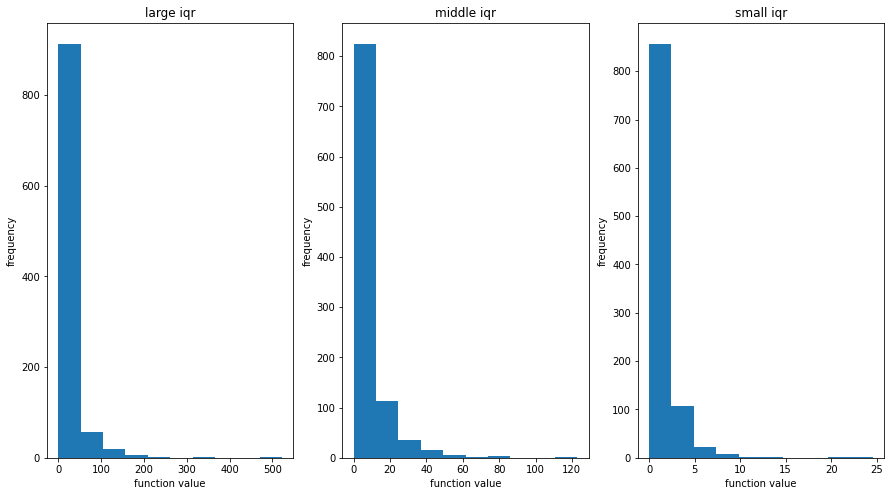

In [41]:
fig = plt.figure(figsize=(15.0, 8.0))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(f_dai)
ax1.set_title('large iqr')
ax1.set_xlabel('function value')
ax1.set_ylabel('frequency')

ax2.hist(middle)
ax2.set_title('middle iqr')
ax2.set_xlabel('function value')
ax2.set_ylabel('frequency')

ax3.hist(small)
ax3.set_title('small iqr')
ax3.set_xlabel('function value')
ax3.set_ylabel('frequency')

plt.show()

In [46]:
print(np.var(f_dai))
print(np.var(middle))
print(np.var(small))

print(np.mean(f_dai))
print(np.mean(middle))
print(np.mean(small))

1287.4367272954148
118.38302051534151
3.21512734895784
19.540097282554857
7.726731428732956
1.3351870178692369


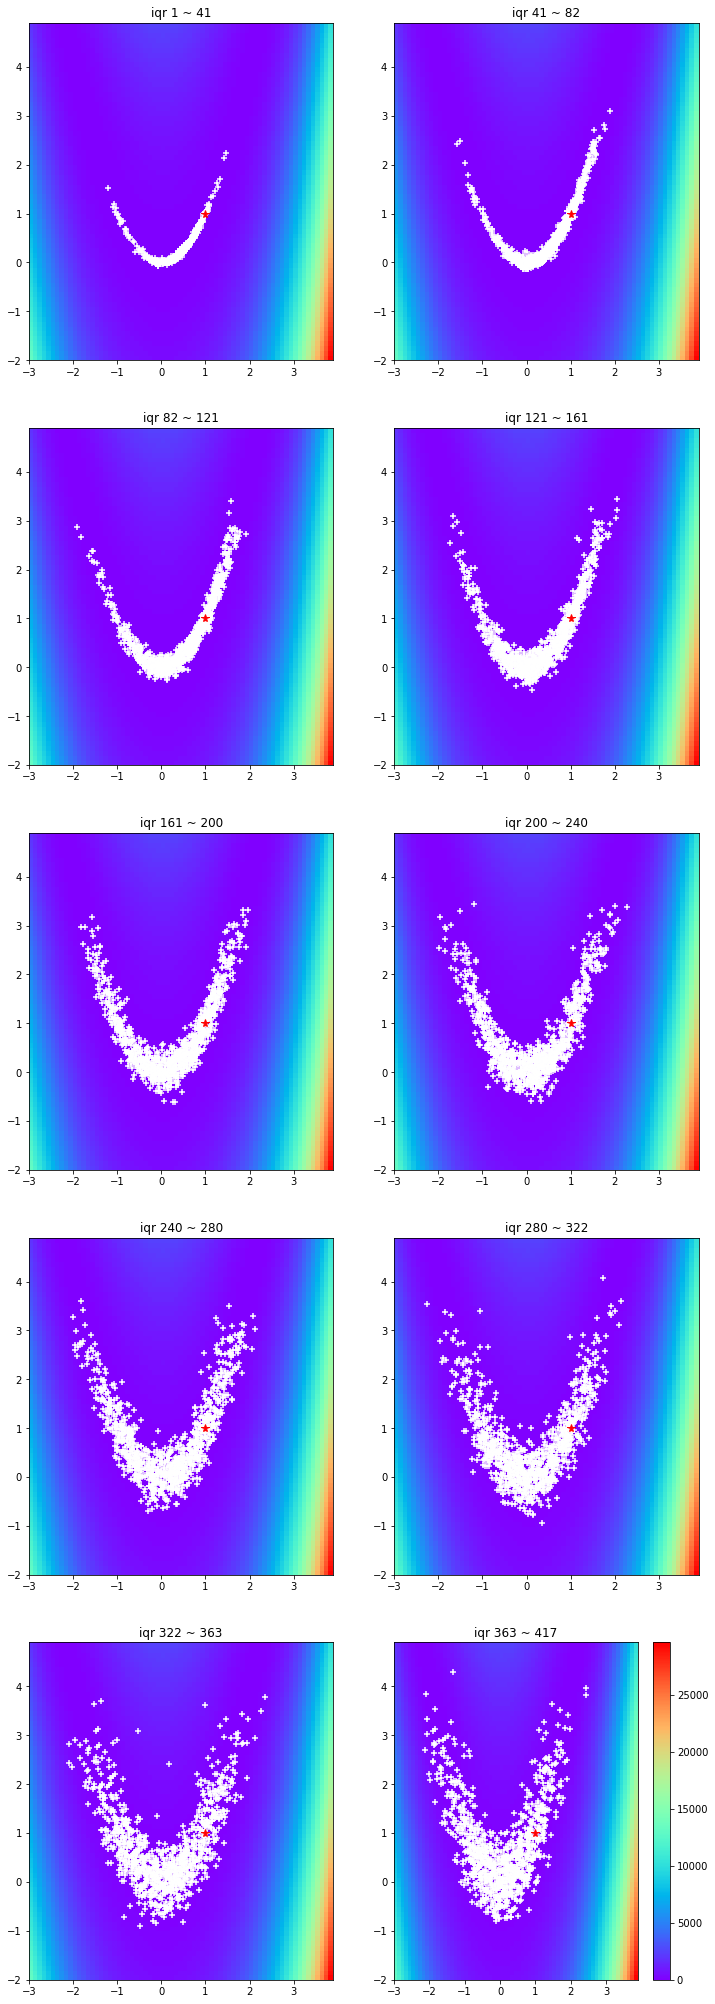

In [29]:
gauss_noise
f = model_opt.RosenBrock()
w_star = f.w_star

x_min = -3
x_max = 4
y_min = -2
y_max = 5
xvals = np.arange(x_min, x_max, 0.1)
yvals = np.arange(y_min, y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])
separate = 10
fig, axes = plt.subplots(int(separate/2),2,  figsize=(12,36))
for i in range(int(separate/2)):
    for j in range(2):
        fig_num = i * 2 + j
        result = gauss_noise[1:,fig_num*1000:999+fig_num*1000]
        iqr_min = int(gauss_noise[0,fig_num*1000])
        iqr_max = int(gauss_noise[0,999+fig_num*1000])
        axes[i][j].set_title("iqr {} ~ {}".format(iqr_min,iqr_max))
        axes[i][j].pcolor(X, Y, Z,cmap=plt.cm.rainbow)
        axes[i][j].scatter(*result,c="w",marker="+")
        axes[i][j].plot(*w_star, 'r*', markersize=8)

norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
fig.colorbar(mappable)



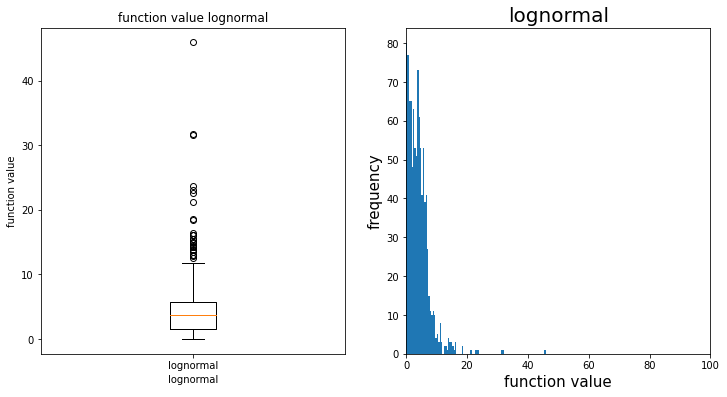

In [82]:
gauss = pd.read_csv("exp_result/gauss_noise/gauss_noise_last_w2020-07-14 02:04:22.594757.csv")[["iqr","w_0","w_1"]].sort_values(['iqr'])
gauss
gauss_noise = gauss.values.T
gauss_part = gauss_noise[1:,:]
f = model_opt.RosenBrock()
gauss_part = np.delete(gauss_part,np.where(gauss_part[1] > 10000000)[0],1)
f_value = f.f_opt(gauss_part)
f_value_gauss = f_value[~np.isnan(f_value)]

fig = plt.figure(figsize=(12.0, 6.0))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


bp1 = ax1.boxplot(f_value_gauss)
ax1.set_xticklabels(["lognormal"])
ax1.set_title('function value lognormal')
ax1.set_xlabel('lognormal')
ax1.set_ylabel('function value')

ax2.hist(f_value,bins=100)
ax2.set_title('lognormal',fontsize=20)
ax2.set_xlabel('function value',fontsize=15)
ax2.set_ylabel('frequency',fontsize=15)
ax2.set_xlim(0,100)




# 描画
plt.show()

In [7]:
lognormal = pd.read_csv("exp_result/lognormal_noise/lognormal_noise_last_w2020-07-07 21:07:24.872086.csv")[["iqr","w_0","w_1"]].sort_values(['iqr'])
lognormal
lognormal_noise = lognormal.values.T

In [24]:
# 10000サンプル中wが発散してしまった率
print("Divergence_rate {}".format(1 - lognormal["w_0"].count() / len(lognormal)))

Divergence_rate 0.06599999999999995


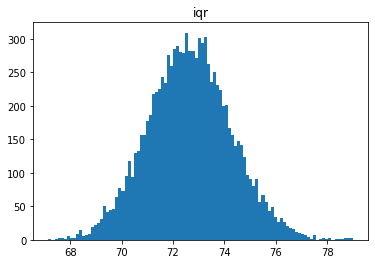

In [9]:
# 10000サンプル中iqrのヒストグラム
plt.hist(lognormal["iqr"],bins=100)
plt.title("iqr")
plt.show()


Text(0.5, 1.0, 'iqr 72.62791792281833 ~ 73.04873657220796')

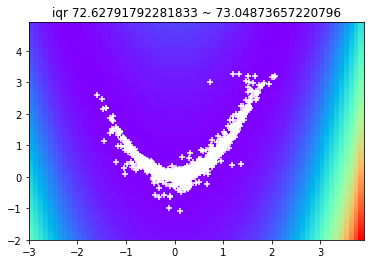

In [58]:
x_min = -3
x_max = 4
y_min = -2
y_max = 5

min = 5000
max = 6000
lognormal_noise_part = lognormal_noise[1:,min:max]
iqr_min = lognormal_noise[0,min]
iqr_max = lognormal_noise[0,max]
xvals = np.arange(x_min, x_max, 0.1)
yvals = np.arange(y_min, y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])
plt.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
plt.scatter(*lognormal_noise_part,c="w",marker="+")
plt.title("iqr {} ~ {}".format(iqr_min,iqr_max))

/Users/naoki/.local/share/virtualenvs/ML-LMvAiov7/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/naoki/.local/share/virtualenvs/ML-LMvAiov7/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


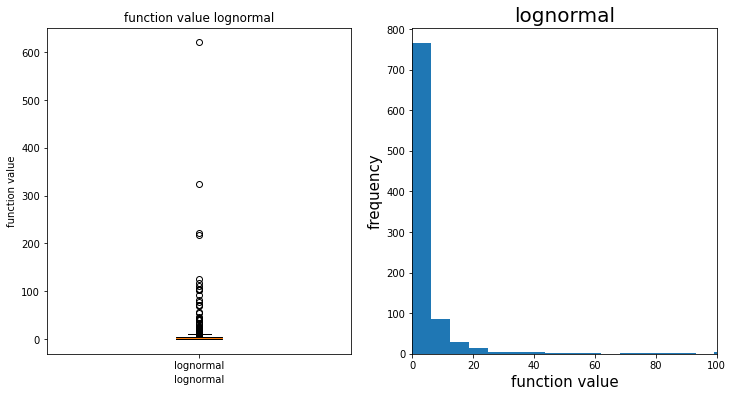

In [60]:
f = model_opt.RosenBrock()

f_value = f.f_opt(lognormal_noise_part)
f_value_log_normal = f_value[~np.isnan(f_value)]



# 箱ひげ図
fig = plt.figure(figsize=(12.0, 6.0))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


bp1 = ax1.boxplot(f_value_log_normal)
ax1.set_xticklabels(["lognormal"])
ax1.set_title('function value lognormal')
ax1.set_xlabel('lognormal')
ax1.set_ylabel('function value')

ax2.hist(f_value,bins=100)
ax2.set_title('lognormal',fontsize=20)
ax2.set_xlabel('function value',fontsize=15)
ax2.set_ylabel('frequency',fontsize=15)
ax2.set_xlim(0,100)




# 描画
plt.show()


In [12]:

pareto = pd.read_csv("exp_result/pareto_noise/pareto_noise10000_last_w2020-07-09 20:56:23.267025.csv")[["iqr","w_0","w_1"]].sort_values(['iqr'])
pareto
pareto_noise = pareto.values.T

In [13]:
# 10000サンプル中wが発散してしまった率
print("Divergence_rate {}".format(1 - pareto["w_0"].count() / len(gauss)))

Divergence_rate 0.15790000000000004


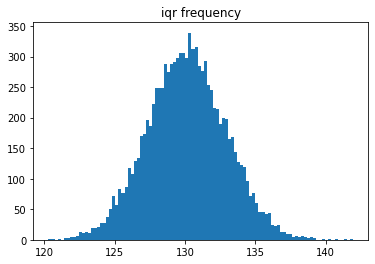

In [30]:
# 10000サンプル中iqrのヒストグラム
plt.hist(pareto["iqr"],bins=100)
plt.title("iqr frequency")
plt.show()

/Users/naoki/.local/share/virtualenvs/ML-LMvAiov7/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


Text(0.5, 1.0, 'iqr 130.12623731484985 ~ 130.80032543238192')

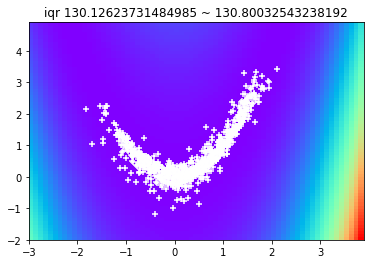

In [15]:
x_min = -3
x_max = 4
y_min = -2
y_max = 5

min = 5000
max = 6000
pareto_noise_part = pareto_noise[1:,min:max]
pareto_noise_part = np.delete(pareto_noise_part,np.where(pareto_noise_part[1] > 10000000)[0],1)
iqr_min = pareto_noise[0,min]
iqr_max = pareto_noise[0,max]
xvals = np.arange(x_min, x_max, 0.1)
yvals = np.arange(y_min, y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])
plt.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
plt.scatter(*pareto_noise_part,c="w",marker="+")
plt.title("iqr {} ~ {}".format(iqr_min,iqr_max))





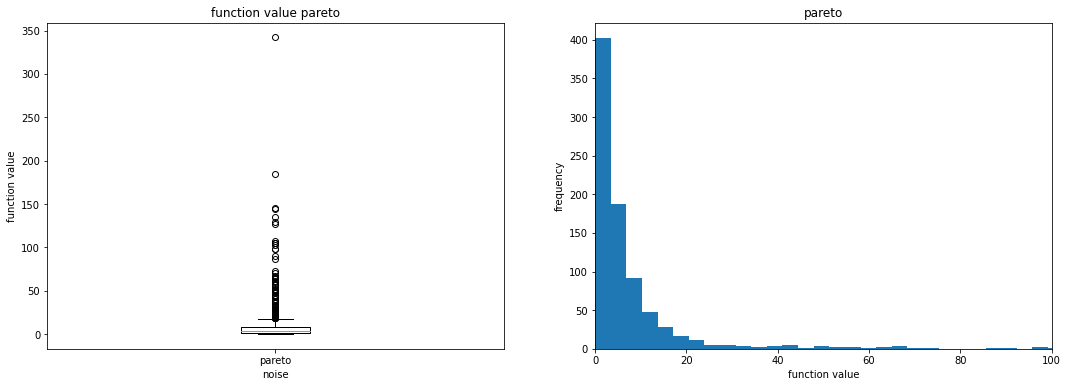

In [16]:
f = model_opt.RosenBrock()
pareto_noise_part = np.delete(pareto_noise_part,np.where(pareto_noise_part[1] > 10000000)[0],1)
f_value = f.f_opt(pareto_noise_part)
f_value = f_value[~np.isnan(f_value)]


# 箱ひげ図
fig = plt.figure(figsize=(18.0, 6.0))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


bp1 = ax1.boxplot(f_value)
ax1.set_xticklabels(["pareto"])
ax1.set_title('function value pareto')
ax1.set_xlabel('noise')
ax1.set_ylabel('function value')

ax2.hist(f_value,bins=100)
ax2.set_title('pareto')
ax2.set_xlabel('function value')
ax2.set_ylabel('frequency')
ax2.set_xlim(0,100)




# 描画
plt.show()


In [80]:
gaussian_mixture = pd.read_csv("exp_result/noise_gaussian_mixture/noise_gaussian_mixture1000_last_w2020-07-14 02:09:15.470359.csv")[["iqr","w_0","w_1"]].sort_values(['iqr'])
gaussian_mixture
gaussian_mixture_noise = gaussian_mixture.values.T

print("Divergence_rate {}".format(1 - gaussian_mixture["w_0"].count() / len(gaussian_mixture)))

Divergence_rate 0.0


Text(0.5, 1.0, 'iqr 78.32134132699497 ~ 81.4051118561108')

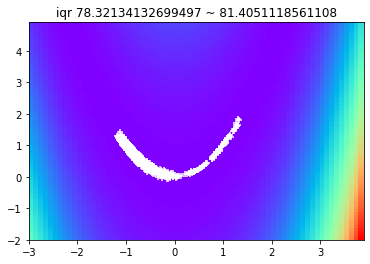

In [49]:
x_min = -3
x_max = 4
y_min = -2
y_max = 5

gaussian_mixture_part = gaussian_mixture_noise[1:,:]
gaussian_mixture_part = np.delete(gaussian_mixture_part,np.where(gaussian_mixture_part[1] > 10000000)[0],1)
iqr_min = gaussian_mixture_noise[0].min()
iqr_max = gaussian_mixture_noise[0].max()
xvals = np.arange(x_min, x_max, 0.1)
yvals = np.arange(y_min, y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])
plt.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
plt.scatter(*gaussian_mixture_part,c="w",marker="+")
plt.title("iqr {} ~ {}".format(iqr_min,iqr_max))


4.076389617871514
2.422627409141885


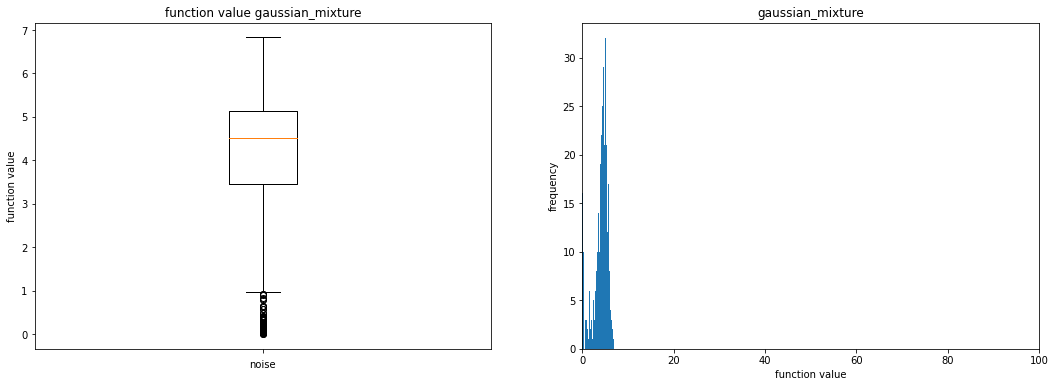

In [93]:
f = model_opt.RosenBrock()
gaussian_mixture_part = np.delete(gaussian_mixture_part,np.where(gaussian_mixture_part[1] > 10000000)[0],1)
f_value = f.f_opt(gaussian_mixture_part)
f_value_gaussian_mixture = f_value[~np.isnan(f_value)]

print(f_value_gaussian_mixture.mean())
print(f_value_gaussian_mixture.var())

# 箱ひげ図
fig = plt.figure(figsize=(18.0, 6.0))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


bp1 = ax1.boxplot(f_value)
ax1.set_xticklabels([""])
ax1.set_title('function value gaussian_mixture')
ax1.set_xlabel('noise')
ax1.set_ylabel('function value')

ax2.hist(f_value,bins=100)
ax2.set_title('gaussian_mixture')
ax2.set_xlabel('function value')
ax2.set_ylabel('frequency')
ax2.set_xlim(0,100)




# 描画
plt.show()


In [81]:

student_t = pd.read_csv("exp_result/student_t_noise/student_t_noise1000_last_w2020-07-14 20:10:50.370840.csv")[["iqr","w_0","w_1"]].sort_values(['iqr'])
print(student_t)
student_t_noise = student_t.values.T
print("Divergence_rate {}".format(1 - student_t["w_0"].count() / len(student_t)))

           iqr       w_0       w_1
436  66.317113 -1.399679  2.012747
870  66.740885 -0.229880  0.233775
211  67.660192  0.158544 -0.020579
59   67.740679 -0.502040  0.353893
883  67.829324  0.138165 -0.061519
..         ...       ...       ...
5    78.593732  1.336223  2.833947
98   78.634717  0.509194  0.632530
43   78.662581       NaN       NaN
557  78.682858       NaN       NaN
704  78.744421 -0.968639  0.987031

[1000 rows x 3 columns]
Divergence_rate 0.259


-2.085998574684162


/Users/naoki/.local/share/virtualenvs/ML-LMvAiov7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


Text(0.5, 1.0, 'iqr 66.31711268220714 ~ 78.7444213252951')

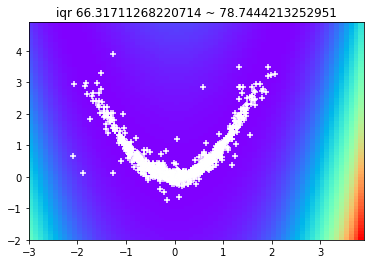

In [75]:
x_min = -3
x_max = 4
y_min = -2
y_max = 5


student_t_part = student_t_noise[1:,:]
student_t_part = np.delete(student_t_part,np.where(student_t_part[1] > 10000000)[0],1)
student_t_part = np.delete(student_t_part,np.where(student_t_part[1] < -10000000)[0],1)
student_t_part = student_t_part[:, ~np.isnan(student_t_part).any(axis=0)]
iqr_min = student_t_noise[0].min()
iqr_max = student_t_noise[0].max()
xvals = np.arange(x_min, x_max, 0.1)
yvals = np.arange(y_min, y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])
plt.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
plt.scatter(*student_t_part,c="w",marker="+")
plt.title("iqr {} ~ {}".format(iqr_min,iqr_max))

12.49165700096394
5807.748256449779


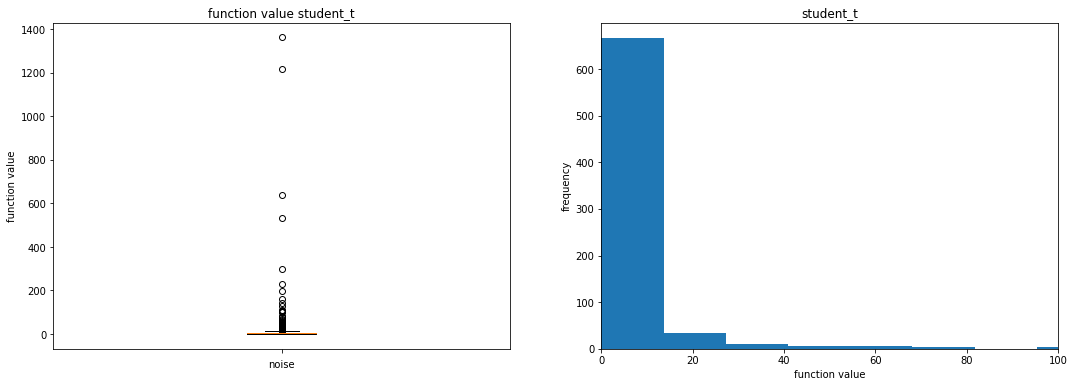

In [91]:
f = model_opt.RosenBrock()
student_t_part = np.delete(student_t_part,np.where(student_t_part[1] > 10000000)[0],1)
f_value = f.f_opt(student_t_part)
f_value_student_t = f_value[~np.isnan(f_value)]

print(f_value_student_t.mean())
print(f_value_student_t.var())

# 箱ひげ図
fig = plt.figure(figsize=(18.0, 6.0))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


bp1 = ax1.boxplot(f_value_student_t)
ax1.set_xticklabels([""])
ax1.set_title('function value student_t')
ax1.set_xlabel('noise')
ax1.set_ylabel('function value')

ax2.hist(f_value_student_t,bins=100)
ax2.set_title('student_t')
ax2.set_xlabel('function value')
ax2.set_ylabel('frequency')
ax2.set_xlim(0,100)




# 描画
plt.show()

Text(0, 0.5, 'function value')

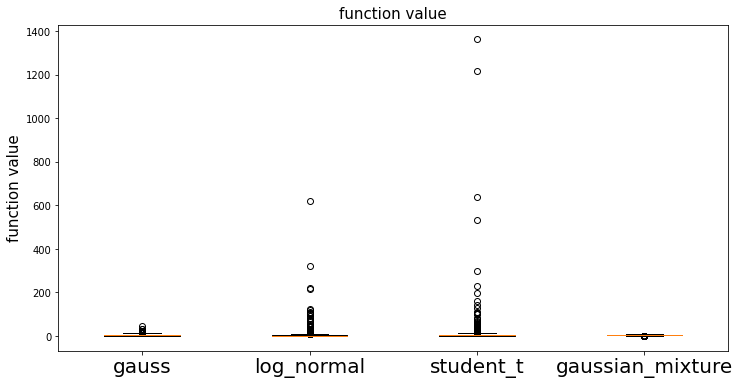

In [92]:

# 箱ひげ図
fig = plt.figure(figsize=(12.0, 6.0))
ax1 = fig.add_subplot(111)



bp1 = ax1.boxplot((f_value_gauss,f_value_log_normal,f_value_student_t,f_value_gaussian_mixture))
ax1.set_xticklabels(["gauss","log_normal","student_t","gaussian_mixture"],fontsize=20)
ax1.set_title('function value',fontsize=15)
ax1.set_ylabel('function value',fontsize=15)

In [95]:
print("student t")
print(f_value_student_t.mean())
print(f_value_student_t.var())
print("gaussian mixture")
print(f_value_gaussian_mixture.mean())
print(f_value_gaussian_mixture.var())

print("log_normal")
print(f_value_log_normal.mean())
print(f_value_log_normal.var())
print("gauss")
print(f_value_gauss.mean())
print(f_value_gauss.var())

student t
12.49165700096394
5807.748256449779
gaussian mixture
4.076389617871514
2.422627409141885
log_normal
6.645534159804809
771.5397372882746
gauss
4.14382644392831
13.987693101019689
